In [19]:
!git clone https://github.com/sunljlzu/lzu18li_1.git

Cloning into 'lzu18li_1'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 68 (delta 20), reused 17 (delta 5), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [0]:
from lzu18li_1 import DE

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.8-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 423.9:   6%|▌         | 11744/200000 [00:17<04:46, 657.32it/s]
Convergence achieved at 11800
Interrupted at 11,799 [5%]: Average Loss = 437.79
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, lambda, tau, beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [01:54<00:00, 12.57draws/s]
There were 129 divergences after tuning. Increase `target_accept` or reparameterize.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8816370427286642, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samp

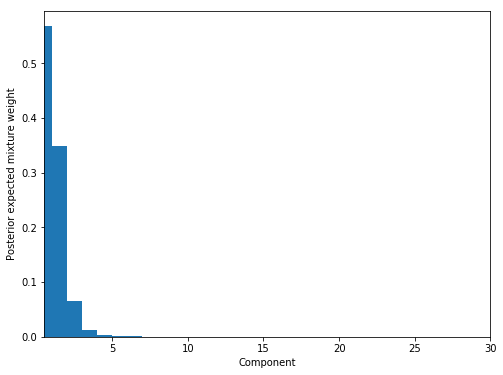

In [21]:
import pandas as pd
import pymc3 as pm

old_faithful_df = pd.read_csv(pm.get_data('old_faithful.csv'))
old_faithful_df['std_waiting'] = (old_faithful_df.waiting - old_faithful_df.waiting.mean()) / old_faithful_df.waiting.std()
x = old_faithful_df.std_waiting.values
post_pdfs = DE.density(x)

In [0]:
pdf = post_pdfs.mean(axis=0)

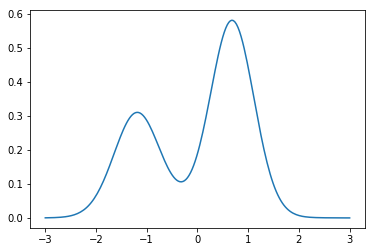

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

x_plot = np.linspace(-3,3,200)
plt.plot(x_plot, pdf)